<a href="https://colab.research.google.com/github/Simon-creator-jara/Inteligencia_artificial/blob/main/Modelos_predictivos_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##IMPORTAR LIBRERÍAS
#Tratmiento de datos
import numpy as np
import pandas as pd 

#Gráficos
import matplotlib.pyplot as plt
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D

#Modelos
from sklearn.cluster import KMeans 
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import silhouette_score

#Advertencias 
import warnings
warnings.filterwarnings('ignore')



In [ ]:
#Configurar los gráficos
plt.rcParams['figure.figsize']=(16,9)
plt.style.use('ggplot')


In [ ]:
#Importar los datos
datos = pd.read_csv('analisis.csv')
datos 

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4
...,...,...,...,...,...,...,...,...
135,XabiAlonso,35.569389,22.133740,38.904885,31.624351,12.201221,47.5420,7
136,XaviRodriguez,31.960417,15.416979,48.533125,40.096458,11.764583,47.5625,4
137,xoellopez,71.696129,12.489274,27.571210,19.093548,3.241935,74.3065,2
138,ZacEfron,51.537405,26.009695,36.465344,23.008168,7.284962,118.6107,1


In [ ]:
#Análisis exploratorio de los datos
#Elementos de estadística descriptiva
datos.describe()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678866,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


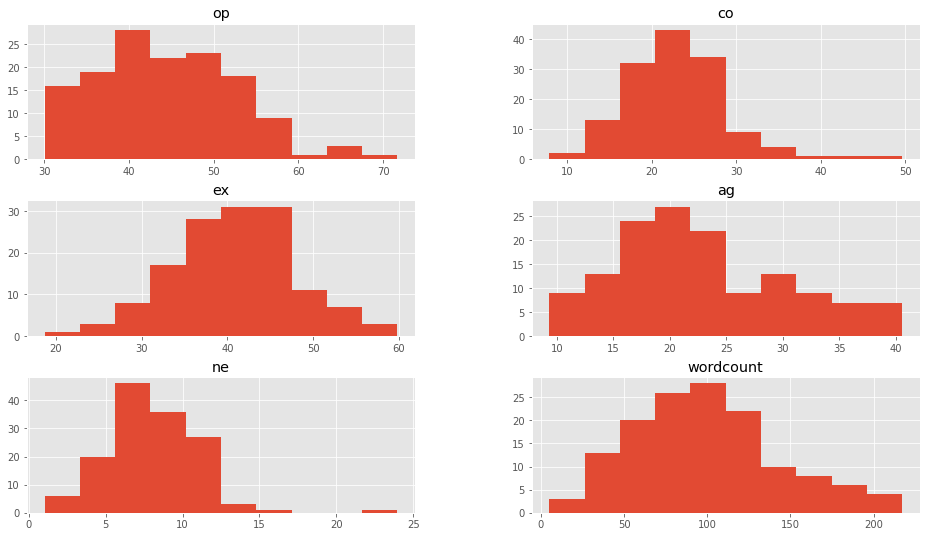

In [ ]:
#Histogramas de frecuencia para las características 
datos.drop(['categoria'],1).hist()
plt.show()

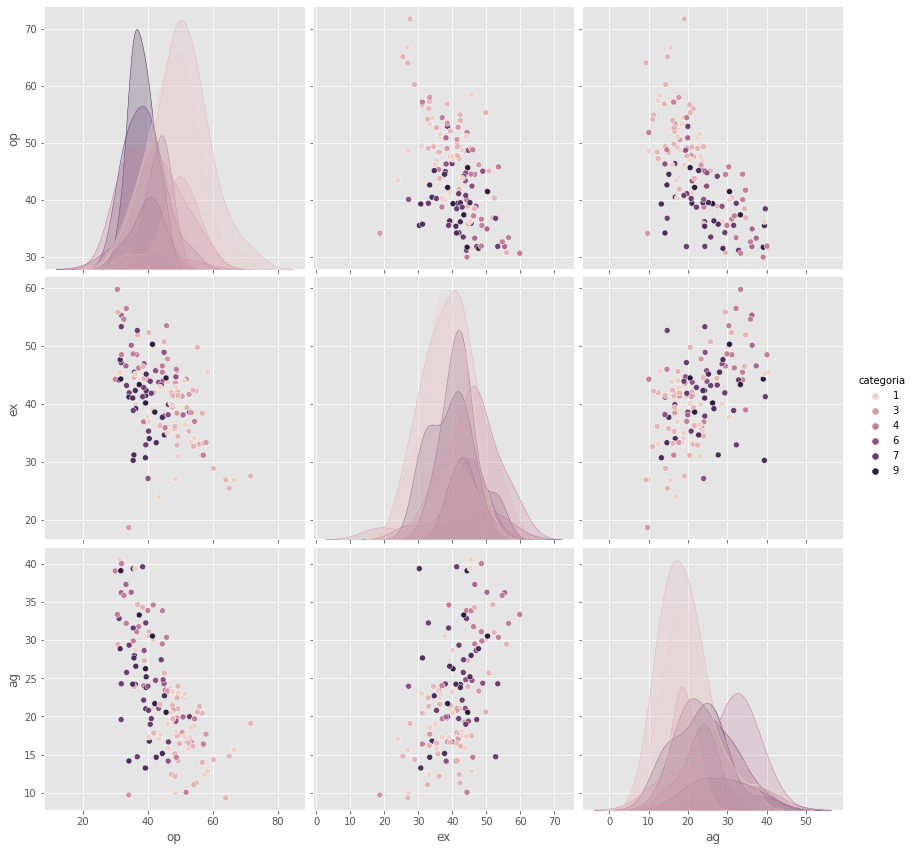

In [ ]:
sb.pairplot(datos.dropna(),hue = 'categoria', size=4, vars=['op','ex','ag'], kind = 'scatter')

In [ ]:
datos.groupby('categoria').size()

categoria
1    27
2    34
3     9
4    19
5     4
6     8
7    17
8    16
9     6
dtype: int64

In [ ]:
#Preparación de datos
x = np.array(datos[['op','ex','ag']])
y = np.array(datos['categoria'])
x.shape

(140, 3)

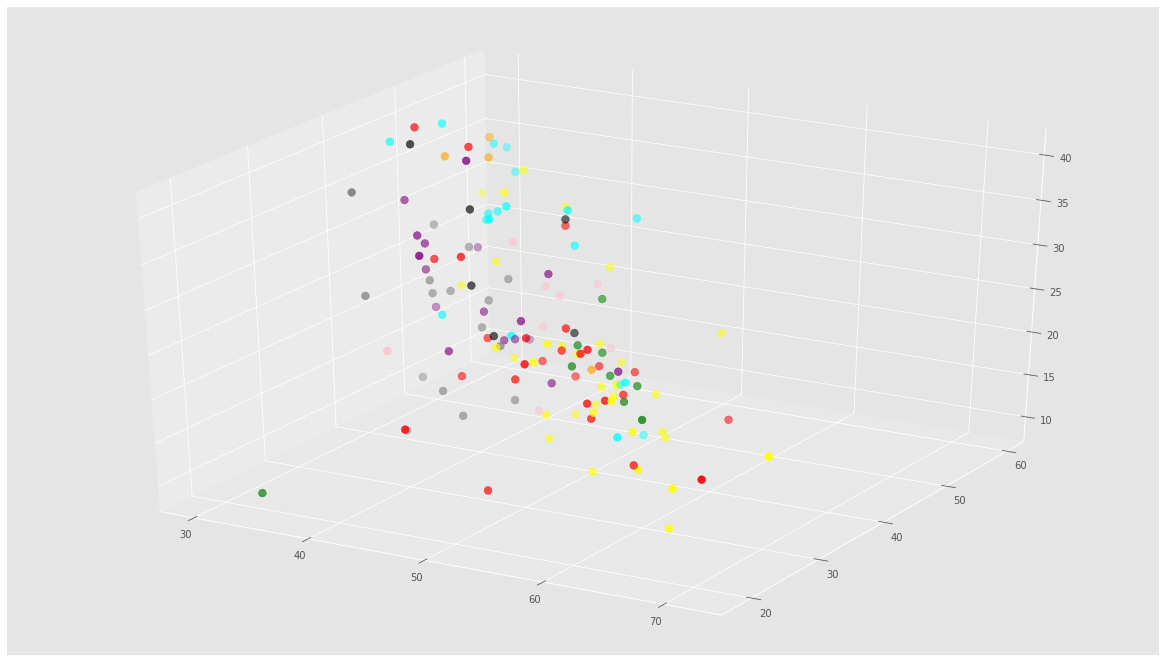

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)
colores = ['blue','red','yellow','green','cyan','orange','pink','purple','gray','black']
asignar =[]

for row in y:
  asignar.append(colores[row])

ax.scatter(x[:,0],x[:,1],x[:,2], c = asignar, s =60)

In [ ]:
#Modelado
numeroCluster= range(1,20)
kmeans = [KMeans(n_clusters = i) for i in numeroCluster]
score = [kmeans[i].fit(x).score(x) for i in range(len(kmeans))]

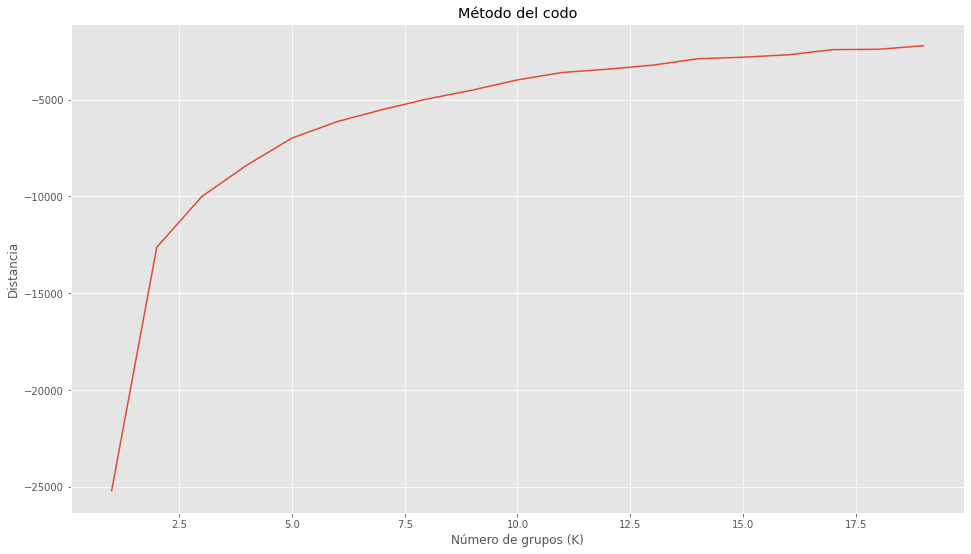

In [ ]:
#Busqueda de hiperparámetro
plt.plot(numeroCluster,score)
plt.xlabel('Número de grupos (K)')
plt.ylabel('Distancia')
plt.title('Método del codo')
plt.show()

In [ ]:
kmeans1 = KMeans(n_clusters=5).fit(x)
centroides1 = kmeans1.cluster_centers_
centroides1

array([[39.74573696, 43.70967146, 23.46148586],
       [57.92200861, 31.5039735 , 15.67199517],
       [35.90241306, 47.56828232, 33.58748762],
       [42.73275924, 33.0308789 , 21.11743814],
       [49.85887044, 41.15660338, 17.54193885]])

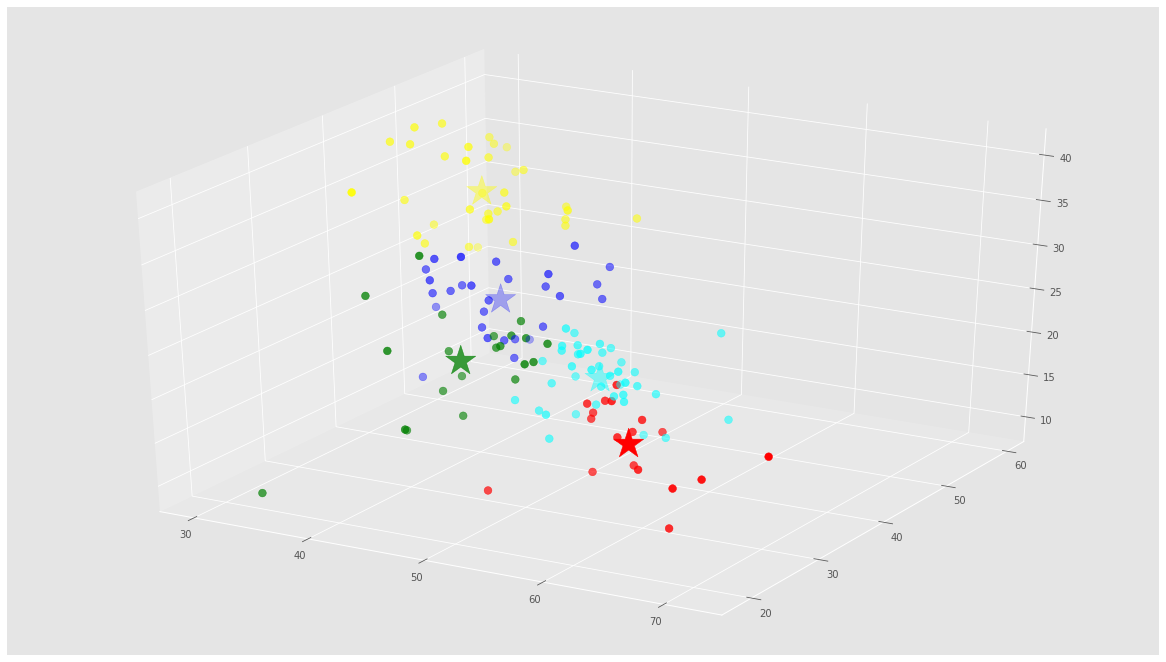

In [ ]:
labels = kmeans1.predict(x)
C = centroides1
colores = ['blue','red','yellow','green','cyan']#,'orange','pink','purple','gray','black','magenta','silver','gold','white','brown']
asignar=[]
for row in labels:
  asignar.append(colores[row])

fig=plt.figure()
ax = Axes3D(fig)
ax.scatter(x[:,0],x[:,1],x[:,2], c = asignar, s=60)
ax.scatter(C[:,0],C[:,1],C[:,2], marker="*", c = colores, s=1000)

Text(0.5, 1.0, 'Indice de silhouette')

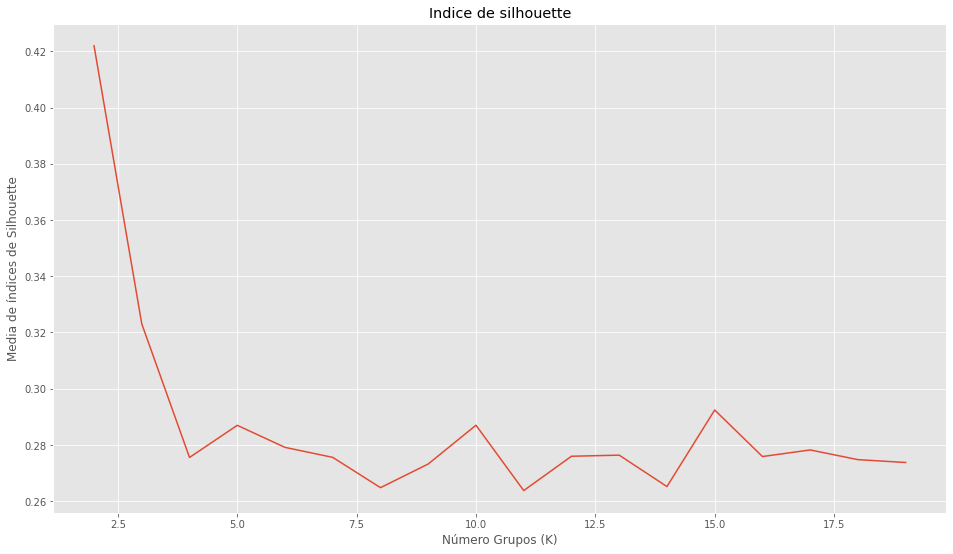

In [ ]:
#Método de silhouette
numeroCluster = range(2,20)
valoresMedios =[]

for n_clusters in numeroCluster:
  modeloKmeans = KMeans(n_clusters = n_clusters)
  labels = modeloKmeans.fit_predict(x)
  mediaSilouhette = silhouette_score(x, labels)
  valoresMedios.append(mediaSilouhette)

plt.plot(numeroCluster, valoresMedios)
plt.xlabel('Número Grupos (K)')
plt.ylabel('Media de índices de Silhouette')
plt.title('Indice de silhouette')